# Color Models: RGB and HSV




### Definizioni

- __R__: Intensity of 'Red'.
- __G__: Intensity of 'Green'.
- __B__: Intensity of 'Blue'.
- __H__: Color attribute 'Hue'.
- __S__: Color attribute 'Saturation'.
- __V__: Color attribute 'Value'.

In [8]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

IMAGE = './data/nature/image4.jpg'

plt.rcParams["figure.figsize"] = [18, 5] 

### RGB 2 HSV

![](rgb2hsv.png)

In [4]:
def RGB2HSV(RGB):
    RGB_normalized = RGB / 255.0                           # Normalize values to 0.0 - 1.0 (float64)
    R = RGB_normalized[:, :, 0]                            # Split channels
    G = RGB_normalized[:, :, 1]
    B = RGB_normalized[:, :, 2]
    
    v_max = np.max(RGB_normalized, axis=2)                 # Compute max, min & chroma
    v_min = np.min(RGB_normalized, axis=2)
    C = v_max - v_min                                      
    
    hue_defined = C > 0                                    # Check if hue can be computed
    
    r_is_max = np.logical_and(R == v_max, hue_defined)     # Computation of hue depends on max
    g_is_max = np.logical_and(G == v_max, hue_defined)
    b_is_max = np.logical_and(B == v_max, hue_defined)
    
    H = np.zeros_like(v_max)                               # Compute hue
    H_r = ((G[r_is_max] - B[r_is_max]) / C[r_is_max]) % 6
    H_g = ((B[g_is_max] - R[g_is_max]) / C[g_is_max]) + 2
    H_b = ((R[b_is_max] - G[b_is_max]) / C[b_is_max]) + 4
    
    H[r_is_max] = H_r
    H[g_is_max] = H_g
    H[b_is_max] = H_b
    H *= 60
    
    V = v_max                                              # Compute value
    
    sat_defined = V > 0
    
    S = np.zeros_like(v_max)                               # Compute saturation
    S[sat_defined] = C[sat_defined] / V[sat_defined]
    
    return np.dstack((H, S, V))

### HSV 2 RGB

![](hsv2rgb.png)

In [7]:
def HSV2RGB(HSV):
    H = HSV[:, :, 0]                                           # Split attributes
    S = HSV[:, :, 1]
    V = HSV[:, :, 2]
    
    C = V * S                                                  # Compute chroma
    
    H_ = H / 60.0                                              # Normalize hue
    X  = C * (1 - np.abs(H_ % 2 - 1))                          # Compute value of 2nd largest color
    
    H_0_1 = np.logical_and(0 <= H_, H_<= 1)                    # Store color orderings
    H_1_2 = np.logical_and(1 <  H_, H_<= 2)
    H_2_3 = np.logical_and(2 <  H_, H_<= 3)
    H_3_4 = np.logical_and(3 <  H_, H_<= 4)
    H_4_5 = np.logical_and(4 <  H_, H_<= 5)
    H_5_6 = np.logical_and(5 <  H_, H_<= 6)
    
    R1G1B1 = np.zeros_like(HSV)                                # Compute relative color values
    Z = np.zeros_like(H)
    
    R1G1B1[H_0_1] = np.dstack((C[H_0_1], X[H_0_1], Z[H_0_1]))  
    R1G1B1[H_1_2] = np.dstack((X[H_1_2], C[H_1_2], Z[H_1_2]))
    R1G1B1[H_2_3] = np.dstack((Z[H_2_3], C[H_2_3], X[H_2_3]))
    R1G1B1[H_3_4] = np.dstack((Z[H_3_4], X[H_3_4], C[H_3_4]))
    R1G1B1[H_4_5] = np.dstack((X[H_4_5], Z[H_4_5], C[H_4_5]))
    R1G1B1[H_5_6] = np.dstack((C[H_5_6], Z[H_5_6], X[H_5_6]))
    
    m = V - C
    RGB = R1G1B1 + np.dstack((m, m, m))                        # Adding the value correction
    
    return RGB

# Loading image

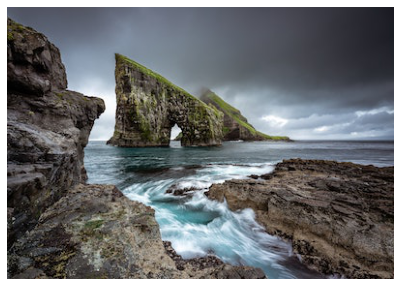

In [9]:
RGB = imageio.imread(IMAGE)   # Load image

plt.imshow(RGB)                             # Plot image
plt.axis('off')
plt.show()

## Conversione da RGB a HSV

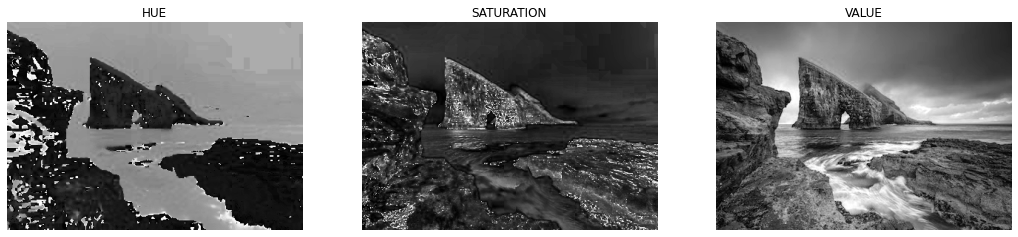

In [12]:
HSV = RGB2HSV(RGB)              # Convert RGB to HSV

HUE = HSV[:, :, 0]              # Split attributes
SAT = HSV[:, :, 1]
VAL = HSV[:, :, 2]

plt.subplot(1,3,1)              # Plot color attributes
plt.imshow(HUE, cmap='gray')
plt.title('HUE')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(SAT, cmap='gray')
plt.title('SATURATION')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(VAL, cmap='gray')
plt.title('VALUE')
plt.axis('off')
plt.show()

## Conversione HSV to RGB

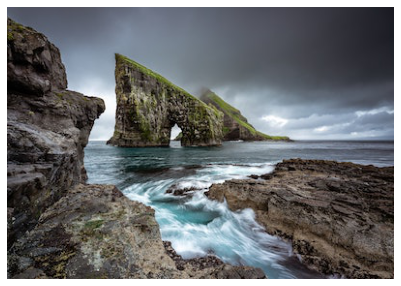

In [14]:
RGB = HSV2RGB(HSV)                                # Convert HSV back to RGB

RGB = (RGB * 255).astype(np.uint8)                # Cast back to 'byte'

plt.imshow(RGB)                                   # Plot image
plt.axis('off')
plt.show()

## Modifica dei canali HSV

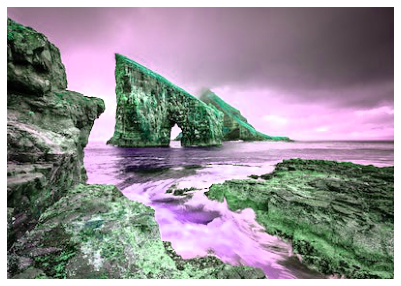

In [18]:
HUE2 = (HUE + 90) % 360                           # Hue shift
SAT2 =  np.minimum(SAT * 1.1, np.ones_like(SAT))  # Increase saturation
VAL2 =  np.minimum(VAL * 1.5, np.ones_like(VAL))  # Increase value (brightness)

HSV2 = np.dstack((HUE2, SAT2, VAL2))              # Stack to a new HSV array
RGB2 = HSV2RGB(HSV2)                              # Convert it to RGB

RGB2 = (RGB2 * 255).astype(np.uint8)              # Cast back to 'byte'

plt.imshow(RGB2)                                  # Plot image
plt.axis('off')
plt.show()